In [3]:
#pip install beautifulsoup

In [1]:
from bs4 import BeautifulSoup
import requests

## Makineyi WebServer gibi çalıştırmak için ayrı bir notebook açıldı.

### aşağıdaki kod html'in içinde tablo varsa hepsini getiyiroyr. Birden fazla tablo varsa df0 df1 df2 olarak ayrı ayrı getiriyor

### Bunları df[0] df[1] gibi getirebilirsin

In [2]:
import pandas as pd

### WEB DEN VERİ ÇEKME KARAR GAZETESİ ZAFER HOCA YAZISI

In [3]:
from bs4 import BeautifulSoup

In [4]:
import requests
from csv import writer

In [5]:
'''
    tipler=[]
    Fiyatlar=[]
    for link in linkler:
        ilanlink='https://www.hepsiemlak.com'+link.a.get('href')
        print(ilanlink)
        page=requests.get(ilanlink)
        soup=BeautifulSoup(page.content,'html.parser')
        tip=soup.find('div',{'class':'spec-groups'}).text
        print(tip)
        Fiyat=soup.find('p',{'class':'fontRB fz24 price'}).text
        print(Fiyat)
        Fiyatlar.append(Fiyat)
        tipler.append(tip)
        
'''

"\n    tipler=[]\n    Fiyatlar=[]\n    for link in linkler:\n        ilanlink='https://www.hepsiemlak.com'+link.a.get('href')\n        print(ilanlink)\n        page=requests.get(ilanlink)\n        soup=BeautifulSoup(page.content,'html.parser')\n        tip=soup.find('div',{'class':'spec-groups'}).text\n        print(tip)\n        Fiyat=soup.find('p',{'class':'fontRB fz24 price'}).text\n        print(Fiyat)\n        Fiyatlar.append(Fiyat)\n        tipler.append(tip)\n        \n"

In [18]:
url="https://bizimhesap.com/fiyatlar"
page=requests.get(url)
soup=BeautifulSoup(page.content,'html.parser')
lists=soup.find_all('ul',class_='prices')
print(lists)

[<ul class="prices"><li class="active"><div class="most-selected"><span>EN ÇOK TERCİH EDİLEN</span></div><div class="text-center"><img alt="Yıllık" loading="lazy" src="https://cdn.bizimhesap.com/content/images/price_watermelon_1.webp"/></div><div class="content"><h2 class="title">Yıllık</h2><h3 class="price"><span class="currency">₺</span>115.00<span class="tax">+ KDV/Ay</span></h3><h5 class="total">Toplam ₺1380.00 + KDV</h5><div class="advantage-info">Aylık Fiyata Göre %<!-- -->25<!-- --> Daha Avantajlı</div></div></li><li class=""><div class="most-selected"></div><div class="text-center"><img alt="6 Aylık" loading="lazy" src="https://cdn.bizimhesap.com/content/images/price_watermelon_2.webp"/></div><div class="content"><h2 class="title">6 Aylık</h2><h3 class="price"><span class="currency">₺</span>135.00<span class="tax">+ KDV/Ay</span></h3><h5 class="total">Toplam ₺810.00 + KDV</h5></div></li><li class=""><div class="most-selected"></div><div class="text-center"><img alt="3 Aylık" lo

In [10]:
# open csv paketi için youtube dan yardım alınmıştır.

with open('ev fiyatlari.csv','w',encoding="utf8",newline="") as f:
    
    thewriter=writer(f)
    header=['fiyat','oda_sayisi','alan','yas']
    thewriter.writerow(header)
    
    for list in lists:
        fiyat=list.find('span',class_='list-view-price')
        fiyatl=fiyat.text.replace("\n","") 
        #tip=list.find('span',class_='left')
        #tipl=tip.text
        s_oda=list.find('span',class_='celly houseRoomCount')
        s_odal=s_oda.text.replace("\n","")
        alan=list.find('span',class_='celly squareMeter list-view-size')
        alanl=alan.text.replace("\n","")
        yas=list.find('span',class_='celly buildingAge')
        yasl=yas.text.replace("\n","") 
        info=[fiyatl,s_odal,alanl,yasl]
        thewriter.writerow(info)
        #print(info)

In [11]:
import pandas as pd

In [12]:
ev=pd.read_csv('ev fiyatlari.csv')

In [13]:
ev.head(10)

fiyat oda_sayisi  \
0                  3.250.000                TL       5 + 1   
1                  6.350.000                TL       2 + 1   
2                  1.850.000                TL       3 + 1   
3                    725.000                TL       2 + 1   
4                  4.600.000                TL       4 + 1   
5                  1.650.000                TL       2 + 1   
6                  5.750.000                TL       5 + 1   
7                  2.180.000                TL       3 + 1   
8                  2.250.000                TL       3 + 2   
9                  1.900.000                TL       3 + 1   

                               alan         yas  
0                            200 m2           5  
1                            510 m2          12  
2                            127 m2  Sıfır Bina  
3                             55 m2           7  
4                            190 m2  Sıfır Bina  
5                            120 m2          10  
6                            212 m2  Sıfır Bina  
7                            127 m2  Sıfır Bina  
8                            170 m2          22  
9                            124 m2  Sıfır Bina

In [14]:
ev.shape

(23, 4)

In [15]:
#price=soup.find_all('span',class_='list-view-price')


In [16]:
print(fiyatl),print(fiyat)

                1.550.000                TL 
<span class="list-view-price" data-v-3bdb9554="">
                1.550.000
                <span class="currency" data-v-3bdb9554="">TL</span> <!-- --></span>


(None, None)

In [17]:
url="https://www.hepsiemlak.com/serdivan-satilik"
page=requests.get(url)
soup=BeautifulSoup(page.content,'html.parser')

In [18]:
next_page_link = soup.find("ul", class_="he-pagination__links")
#lists=soup.find_all('div',class_='list-view-content')
print(next_page_link)

<ul class="he-pagination__links" data-v-444f171e=""><li class="he-pagination__item he-pagination__item--active" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik" tabindex="0" title="Serdivan Satılık Ev - 1">1</a></li><li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=2" tabindex="0" title="Serdivan Satılık Ev - 2">2</a></li><li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=3" tabindex="0" title="Serdivan Satılık Ev - 3">3</a></li><li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=4" tabindex="0" title="Serdivan Satılık Ev - 4">4</a></li><li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=5" tabindex="0" title="Serdivan Satılık Ev - 

In [19]:
'''
with open('ev fiyatlari.csv','w',encoding="utf8",newline="") as f:
    
    thewriter=writer(f)
    header=['fiyat','oda_sayisi','alan','yas']
    thewriter.writerow(header)
'''

'\nwith open(\'ev fiyatlari.csv\',\'w\',encoding="utf8",newline="") as f:\n    \n    thewriter=writer(f)\n    header=[\'fiyat\',\'oda_sayisi\',\'alan\',\'yas\']\n    thewriter.writerow(header)\n'

<li class="he-pagination__item he-pagination__item--active" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik" tabindex="0" title="Serdivan Satılık Ev - 1">1</a></li>
https://www.hepsiemlak.com/serdivan-satilik
<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Serdivan Satılık Konut &amp; Ev Fiyatları | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-h
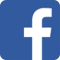
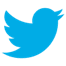
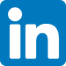
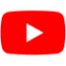
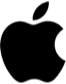

<li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=2" tabindex="0" title="Serdivan Satılık Ev - 2">2</a></li>
https://www.hepsiemlak.com/serdivan-satilik?page=2
<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Serdivan Satılık Konut &amp; Ev Fiyatları  &gt; Sayfa 2 | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-h
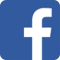
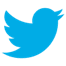
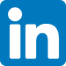
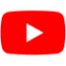
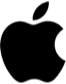

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=4" tabindex="0" title="Serdivan Satılık Ev - 4">4</a></li>
https://www.hepsiemlak.com/serdivan-satilik?page=4
<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Serdivan Satılık Konut &amp; Ev Fiyatları  &gt; Sayfa 4 | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-h
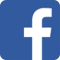
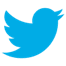
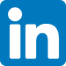
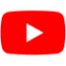
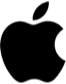

<li class="he-pagination__item" data-v-444f171e=""><a class="he-pagination__link" data-v-444f171e="" href="/serdivan-satilik?page=5" tabindex="0" title="Serdivan Satılık Ev - 5">5</a></li>
https://www.hepsiemlak.com/serdivan-satilik?page=5
<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Serdivan Satılık Konut &amp; Ev Fiyatları  &gt; Sayfa 5 | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-h
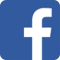
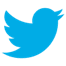
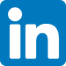
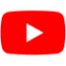
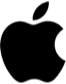

AttributeError: 'NoneType' object has no attribute 'get'

In [20]:
if next_page_link is not None:
     with open('ev fiyatlari.csv','w',encoding="utf8",newline="") as f:
            thewriter=writer(f)
            header=['fiyat','oda_sayisi','alan','yas']
            thewriter.writerow(header)
            



            for link in next_page_link:
                ilanlinki="https://www.hepsiemlak.com"+link.a.get("href")
                page=requests.get(ilanlinki)
                soup=BeautifulSoup(page.content,'html.parser')
                print(link)
                print(ilanlinki)
                print(soup)
                #lists=soup.find_all('div',class_='list-view-content')
                print(lists)

                for list in soup: 

                    lists=soup.find_all('div',class_='list-view-content')
                    print(lists)

                    for list in lists:
                        fiyat=list.find('span',class_='list-view-price')
                        fiyatl=fiyat.text.replace("\n","") 
                        #tip=list.find('span',class_='left')
                        #tipl=tip.text
                        s_oda=list.find('span',class_='celly houseRoomCount')
                        s_odal=s_oda.text.replace("\n","")
                        alan=list.find('span',class_='celly squareMeter list-view-size')
                        alanl=alan.text.replace("\n","")
                        yas=list.find('span',class_='celly buildingAge')
                        yasl=yas.text.replace("\n","") 
                        info=[fiyatl,s_odal,alanl,yasl]
                        thewriter.writerow(info)
                        #print(info)
                    #print(ilanlinki)


In [21]:
ev=pd.read_csv('ev fiyatlari.csv')

In [22]:
ev.shape

(476, 4)

In [23]:
pd.set_option('display.max_rows', None)
ev.head(100)

fiyat oda_sayisi  \
0                    3.250.000                TL       5 + 1   
1                    6.350.000                TL       2 + 1   
2                    1.850.000                TL       3 + 1   
3                      725.000                TL       2 + 1   
4                    4.600.000                TL       4 + 1   
5                    1.650.000                TL       2 + 1   
6                    5.750.000                TL       5 + 1   
7                    2.180.000                TL       3 + 1   
8                    2.250.000                TL       3 + 2   
9                    1.900.000                TL       3 + 1   
10                   1.050.000                TL       2 + 1   
11                   2.000.000                TL       3 + 1   
12                   2.400.000                TL       3 + 1   
13                   1.500.000                TL       3 + 1   
14                     935.000                TL       2 + 1   
15                   1.245.000                TL       2 + 1   
16                   1.820.000                TL       4 + 2   
17                   1.630.000                TL       3 + 1   
18                   1.200.000                TL       2 + 1   
19                   4.950.000                TL       5 + 1   
20                   1.200.000                TL      Stüdyo   
21                   7.500.000                TL       5 + 1   
22                   1.550.000                TL       2 + 1   
23                   3.250.000                TL       5 + 1   
24                   6.350.000                TL       2 + 1   
25                   1.850.000                TL       3 + 1   
26                     725.000                TL       2 + 1   
27                   4.600.000                TL       4 + 1   
28                   1.650.000                TL       2 + 1   
29                   5.750.000                TL       5 + 1   
30                   2.180.000                TL       3 + 1   
31                   2.250.000                TL       3 + 2   
32                   1.900.000                TL       3 + 1   
33                   1.050.000                TL       2 + 1   
34                   2.000.000                TL       3 + 1   
35                   2.400.000                TL       3 + 1   
36                   1.500.000                TL       3 + 1   
37                     935.000                TL       2 + 1   
38                   1.245.000                TL       2 + 1   
39                   1.820.000                TL       4 + 2   
40                   1.630.000                TL       3 + 1   
41                   1.200.000                TL       2 + 1   
42                   4.950.000                TL       5 + 1   
43                   1.200.000                TL      Stüdyo   
44                   7.500.000                TL       5 + 1   
45                   1.550.000                TL       2 + 1   
46                   3.250.000                TL       5 + 1   
47                   6.350.000                TL       2 + 1   
48                   1.850.000                TL       3 + 1   
49                     725.000                TL       2 + 1   
50                   4.600.000                TL       4 + 1   
51                   1.650.000                TL       2 + 1   
52                   5.750.000                TL       5 + 1   
53                   2.180.000                TL       3 + 1   
54                   2.250.000                TL       3 + 2   
55                   1.900.000                TL       3 + 1   
56                   1.050.000                TL       2 + 1   
57                   2.000.000                TL       3 + 1   
58                   2.400.000                TL       3 + 1   
59                   1.500.000                TL       3 + 1   
60                     935.000                TL       2 + 1   
61                   1.245.000                TL       2 + 1   
62          

In [24]:
ev.fiyat.nunique()

87

In [25]:
#ev.astype(int')

In [26]:
ev.info

<bound method DataFrame.info of                                              fiyat oda_sayisi  \
0                     3.250.000                TL       5 + 1   
1                     6.350.000                TL       2 + 1   
2                     1.850.000                TL       3 + 1   
3                       725.000                TL       2 + 1   
4                     4.600.000                TL       4 + 1   
5                     1.650.000                TL       2 + 1   
6                     5.750.000                TL       5 + 1   
7                     2.180.000                TL       3 + 1   
8                     2.250.000                TL       3 + 2   
9                     1.900.000                TL       3 + 1   
10                    1.050.000                TL       2 + 1   
11                    2.000.000                TL       3 + 1   
12                    2.400.000                TL       3 + 1   
13                    1.500.000                TL       3 

In [27]:
'''
for sayfa in next_page_link:
    sayfalar=soup.find_all("https://www.hepsiemlak.com/serdivan-satilik"+sayfa.a.get("href"))
    print(sayfalar)
    
'''

'\nfor sayfa in next_page_link:\n    sayfalar=soup.find_all("https://www.hepsiemlak.com/serdivan-satilik"+sayfa.a.get("href"))\n    print(sayfalar)\n    \n'

In [28]:
ev['fiyat']=ev['fiyat'].astype(object)

In [29]:

#ev['fiyat']=ev['fiyat'].replace()
ev['fiyat']=ev['fiyat'].str.replace("TL",'',regex=True)
ev['fiyat']=ev['fiyat'].str.replace(".","").astype(int)

C:\Users\okocabiyik\AppData\Local\Temp\ipykernel_20828\2636642548.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ev['fiyat']=ev['fiyat'].str.replace(".","").astype(int)


In [30]:
ev.head()

fiyat oda_sayisi                              alan         yas
0  3250000      5 + 1                            200 m2           5
1  6350000      2 + 1                            510 m2          12
2  1850000      3 + 1                            127 m2  Sıfır Bina
3   725000      2 + 1                             55 m2           7
4  4600000      4 + 1                            190 m2  Sıfır Bina

In [31]:
ev['alan'] = ev['alan'].str.rstrip('m2').astype(int)

In [32]:
import re as re

In [33]:
ev['yas']=ev['yas'].replace({'Sıfır Bina':'0'})   

In [34]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
ev['yas']=ev['yas'].apply(lambda x: find_number(x))

In [35]:
ev['yas']=ev['yas'].astype(int)

In [36]:
#ev['yas']=ev['yas'].str.split(r'[0-9]')

In [37]:
ev.oda_sayisi.value_counts()

3 + 1     184
2 + 1     132
4 + 1      52
5 + 1      36
1 + 1      16
6 + 2      12
4 + 2       8
6 + 1       8
3 + 2       4
Stüdyo      4
7 + 1       4
8 + 1       4
5 + 2       4
13 + 7      4
2 + 2       4
Name: oda_sayisi, dtype: int64

In [38]:
ev['oda_sayisi']=ev['oda_sayisi'].replace({'Stüdyo':'2'}) 

In [39]:
ev[['a','b','c']]=ev['oda_sayisi'].str.split(expand=True)


In [40]:
ev['a']=ev['a'].astype(int)
ev['c'].value_counts()
ev['c']=ev['c'].fillna(0)
ev['c'].unique()

array(['1', '2', 0, '7'], dtype=object)

In [41]:
ev['c']=ev['c'].astype(int)

In [42]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fiyat       476 non-null    int32 
 1   oda_sayisi  476 non-null    object
 2   alan        476 non-null    int32 
 3   yas         476 non-null    int32 
 4   a           476 non-null    int32 
 5   b           472 non-null    object
 6   c           476 non-null    int32 
dtypes: int32(5), object(2)
memory usage: 16.9+ KB


In [43]:
ev['oda_sayisi_n']=ev['a']+ev['c']

In [44]:
ev.head()

fiyat oda_sayisi  alan  yas  a  b  c  oda_sayisi_n
0  3250000      5 + 1   200    5  5  +  1             6
1  6350000      2 + 1   510   12  2  +  1             3
2  1850000      3 + 1   127    0  3  +  1             4
3   725000      2 + 1    55    7  2  +  1             3
4  4600000      4 + 1   190    0  4  +  1             5

In [45]:
ev.drop(['oda_sayisi','b','a','c'],axis=1,inplace=True)

In [46]:
ev.head()

fiyat  alan  yas  oda_sayisi_n
0  3250000   200    5             6
1  6350000   510   12             3
2  1850000   127    0             4
3   725000    55    7             3
4  4600000   190    0             5

In [47]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fiyat         476 non-null    int32
 1   alan          476 non-null    int32
 2   yas           476 non-null    int32
 3   oda_sayisi_n  476 non-null    int32
dtypes: int32(4)
memory usage: 7.6 KB


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [49]:

from sklearn.model_selection import train_test_split

In [50]:
ev.drop_duplicates(inplace=True)

In [51]:
ev.head()

fiyat  alan  yas  oda_sayisi_n
0  3250000   200    5             6
1  6350000   510   12             3
2  1850000   127    0             4
3   725000    55    7             3
4  4600000   190    0             5

In [52]:
ev.corr()

fiyat      alan       yas  oda_sayisi_n
fiyat         1.000000  0.817859 -0.240867      0.594579
alan          0.817859  1.000000 -0.081196      0.704971
yas          -0.240867 -0.081196  1.000000     -0.077489
oda_sayisi_n  0.594579  0.704971 -0.077489      1.000000

In [53]:
ev.describe()

fiyat        alan         yas  oda_sayisi_n
count  1.190000e+02  119.000000  119.000000    119.000000
mean   3.045025e+06  171.949580    7.773109      4.327731
std    2.912730e+06  107.299032    7.787906      1.996222
min    7.000000e+05   41.000000    0.000000      2.000000
25%    1.265000e+06  110.000000    4.000000      3.000000
50%    2.000000e+06  140.000000    5.000000      4.000000
75%    3.750000e+06  197.500000   10.000000      5.000000
max    2.000000e+07  510.000000   38.000000     20.000000

<AxesSubplot:>

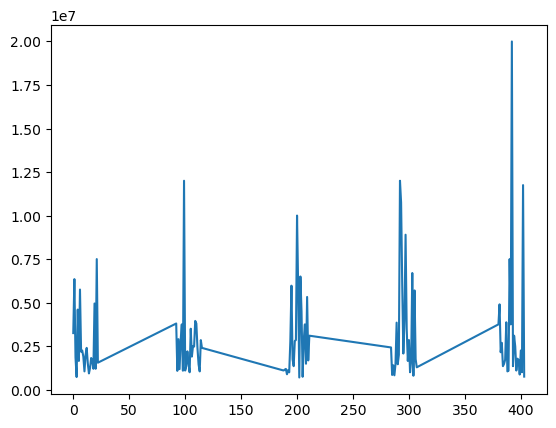

In [54]:
ev.fiyat.plot()

In [55]:
ev=ev[ev['fiyat']<790000000]

In [56]:
y=ev['fiyat']
x=ev.drop(['fiyat'],axis=1)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [58]:
model = Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(44,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [59]:
model.fit(x,y,batch_size=10,epochs=500)
model.summary()

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 17684785790976.0000
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 17684594950144.0000
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 17684330708992.0000
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 17683938541568.0000
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 17683198246912.0000
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 17681772183552.0000
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 17679555493888.0000
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 17675333926912.0000
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 17669120065536.0000
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 17659754184704.0000
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - l

12/12 [==============================] - 0s 1ms/step - loss: 2854155452416.0000
Epoch 176/500
12/12 [==============================] - 0s 2ms/step - loss: 2842928087040.0000
Epoch 177/500
12/12 [==============================] - 0s 1ms/step - loss: 2845788078080.0000
Epoch 178/500
12/12 [==============================] - 0s 2ms/step - loss: 2843440578560.0000
Epoch 179/500
12/12 [==============================] - 0s 2ms/step - loss: 2839448125440.0000
Epoch 180/500
12/12 [==============================] - 0s 2ms/step - loss: 2839098687488.0000
Epoch 181/500
12/12 [==============================] - 0s 1ms/step - loss: 2840089329664.0000
Epoch 182/500
12/12 [==============================] - 0s 1ms/step - loss: 2839824564224.0000
Epoch 183/500
12/12 [==============================] - 0s 2ms/step - loss: 2841393758208.0000
Epoch 184/500
12/12 [==============================] - 0s 2ms/step - loss: 2833198874624.0000
Epoch 185/500
12/12 [==============================] - 0s 2ms/step - loss:

12/12 [==============================] - 0s 1ms/step - loss: 2646549200896.0000
Epoch 350/500
12/12 [==============================] - 0s 1ms/step - loss: 2646012592128.0000
Epoch 351/500
12/12 [==============================] - 0s 759us/step - loss: 2647504453632.0000
Epoch 352/500
12/12 [==============================] - 0s 1ms/step - loss: 2636491259904.0000
Epoch 353/500
12/12 [==============================] - 0s 1ms/step - loss: 2638100824064.0000
Epoch 354/500
12/12 [==============================] - 0s 1ms/step - loss: 2644202487808.0000
Epoch 355/500
12/12 [==============================] - 0s 1ms/step - loss: 2635142791168.0000
Epoch 356/500
12/12 [==============================] - 0s 846us/step - loss: 2636897058816.0000
Epoch 357/500
12/12 [==============================] - 0s 1ms/step - loss: 2634404331520.0000
Epoch 358/500
12/12 [==============================] - 0s 1ms/step - loss: 2637222117376.0000
Epoch 359/500
12/12 [==============================] - 0s 1ms/step - l

<AxesSubplot:>

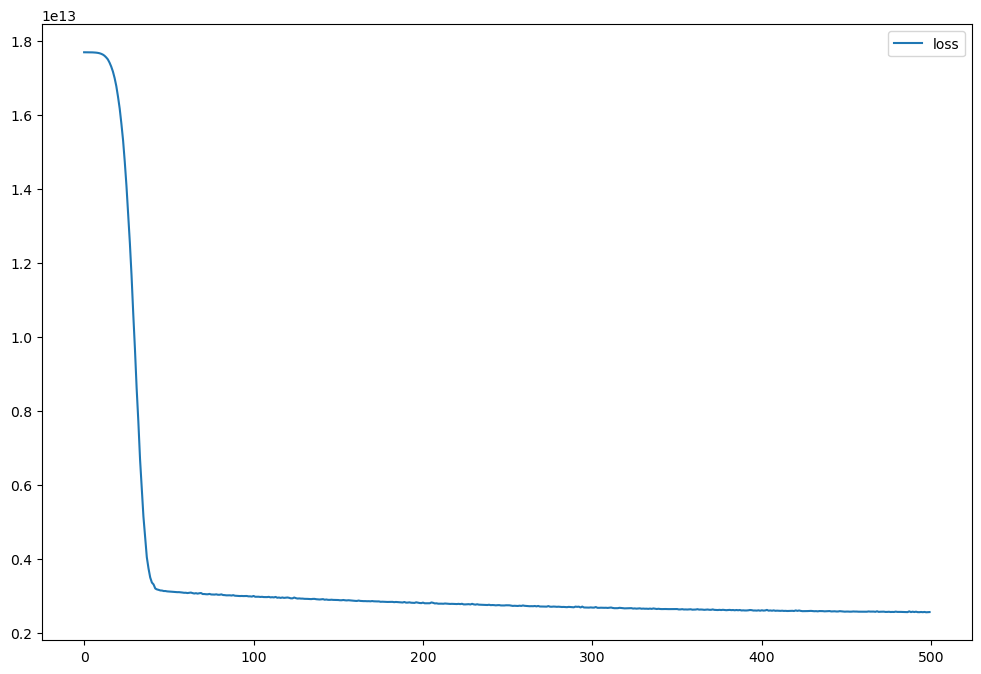

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [61]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 89ms/step - loss: 1152205062144.0000
test loss, test acc: 1152205062144.0


In [62]:
pred=model.predict(x_test)

1/1 [==============================] - 0s 64ms/step


In [63]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [64]:
(mean_squared_error(pred,y_test))**0.5  

1073408.1106253073

In [65]:
r2_score(pred,y_test)

0.6666618959372599

In [66]:
#pip install xgboost

In [67]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [ ]:
algo_test(x,y)

In [68]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'

In [69]:
pred=pd.Series(pred)

ValueError: Data must be 1-dimensional

In [70]:
y_test.reset_index(inplace=True, drop=True)

In [71]:
pred

array([[2402828.5 ],
       [1747434.  ],
       [3916369.5 ],
       [3395297.2 ],
       [1597008.  ],
       [7842693.  ],
       [2146385.8 ],
       [1274086.4 ],
       [8538147.  ],
       [1989994.  ],
       [ 804911.5 ],
       [2673423.5 ],
       [2240471.  ],
       [4539714.5 ],
       [2505100.8 ],
       [1009885.2 ],
       [2511066.2 ],
       [3860029.2 ],
       [3329247.  ],
       [3191180.5 ],
       [ 801167.25],
       [3290895.2 ],
       [4054864.2 ],
       [3078769.2 ]], dtype=float32)

In [72]:
y_test

0      1350000
1      1650000
2      4600000
3      2845000
4      1180000
5     11750000
6      1680000
7      1050000
8      6700000
9      1400000
10     1200000
11     1780000
12     2000000
13     4900000
14     2400000
15     1100000
16     1000000
17     3250000
18     2150000
19     2485000
20      740000
21     3950000
22     3750000
23     2775000
Name: fiyat, dtype: int32

In [191]:
pred-y_test

0    -3.839220e+05
1    -1.238372e+06
2    -2.065518e+05
3    -8.091370e+05
4     4.995618e+05
5    -1.488625e+03
6     4.731631e+05
7    -6.072940e+05
8     3.108356e+06
9     2.692681e+06
10    1.696732e+06
11   -2.874525e+05
12    6.569000e+04
13    5.551968e+05
14    1.274914e+06
15    2.603522e+05
16   -1.627210e+05
17   -4.105053e+04
18   -8.935850e+04
19   -3.252809e+05
20   -4.006490e+05
21    2.352088e+06
22   -2.098416e+05
23    1.012900e+04
dtype: float64

In [192]:
y_test,pred,pred-y_test

(0     3300000
 1     3750000
 2     1400000
 3     4975000
 4     1150000
 5      900000
 6      835000
 7     5500000
 8     1250000
 9     5850000
 10    1150000
 11    1625000
 12    2500000
 13    2025000
 14     750000
 15    3750000
 16    1800000
 17     550000
 18    3750000
 19    1875000
 20    1360000
 21    3090000
 22     950000
 23    1750000
 Name: fiyat, dtype: int32,
 0     2.916078e+06
 1     2.511628e+06
 2     1.193448e+06
 3     4.165863e+06
 4     1.649562e+06
 5     8.985114e+05
 6     1.308163e+06
 7     4.892706e+06
 8     4.358356e+06
 9     8.542681e+06
 10    2.846732e+06
 11    1.337548e+06
 12    2.565690e+06
 13    2.580197e+06
 14    2.024914e+06
 15    4.010352e+06
 16    1.637279e+06
 17    5.089495e+05
 18    3.660642e+06
 19    1.549719e+06
 20    9.593510e+05
 21    5.442088e+06
 22    7.401584e+05
 23    1.760129e+06
 dtype: float32,
 0    -3.839220e+05
 1    -1.238372e+06
 2    -2.065518e+05
 3    -8.091370e+05
 4     4.995618e+05
 5    -1.488625

In [193]:
a=(1-(pred-y_test/y_test))*100
a

0    -2.916076e+08
1    -2.511626e+08
2    -1.193446e+08
3    -4.165861e+08
4    -1.649560e+08
5    -8.985094e+07
6    -1.308161e+08
7    -4.892704e+08
8    -4.358354e+08
9    -8.542679e+08
10   -2.846730e+08
11   -1.337546e+08
12   -2.565688e+08
13   -2.580195e+08
14   -2.024912e+08
15   -4.010350e+08
16   -1.637277e+08
17   -5.089475e+07
18   -3.660640e+08
19   -1.549717e+08
20   -9.593490e+07
21   -5.442086e+08
22   -7.401564e+07
23   -1.760127e+08
dtype: float64

# selenium diyea birşey var bu chrome un nereye kurulduğunu istiyor. Bu beautifulsoup dan çok daha gelişmiş
# 


# Çok önemliStreamlit.io python ile websitesi yapma 

# Çok önemli flask python bu da websitesi yapma

# Çok önemli djangoproject.com web sitesi yapma